# TASK1

## imports

In [ ]:
# Imports
import numpy as np
import random
from datetime import datetime
import time
import matplotlib.pyplot as plt
import pandas as pd
import pickle

## parameters

In [ ]:
# Parameters
n_cities = 20

n_population = 10

mutation_rate = 0.1

## Code to retrieve the distances between cities ( description of components to run in the comments )

In [ ]:
# Uploading the list of coordenades representing each city -- uncomment this code and comment the one indicated with the comment "comment" if not the first run, in order to not have random city cooridinates and make a fair comparison between each execution of the algorithm.

'''
#pickle load to have the same distances always
with open('city_coordinates.pkl', 'rb') as f:
    cities_dict = pickle.load(f)

print("Loaded Dictionary:", cities_dict)
'''


coordinates_list = [[x,y] for x,y in zip(np.random.randint(0,100,n_cities),np.random.randint(0,100,n_cities))]       #comment if it not the first run.
names_list = np.array(['Berlin', 'London', 'Moscow', 'Barcelona', 'Rome', 'Paris', 'Vienna', 'Munich', 'Istanbul', 'Kyiv', 'Bucharest', 'Minsk', 'Warsaw', 'Budapest', 'Milan', 'Prague', 'Sofia', 'Birmingham', 'Brussels', 'Amsterdam'])
cities_dict = { x:y for x,y in zip(names_list,coordinates_list)}         #comment if it not the first run.

# Function to compute the distance between two points (put a space if uncommnt above)
def compute_city_distance_coordinates(a,b):
     return ((a[0]-b[0])**2+(a[1]-b[1])**2)**0.5

def compute_city_distance_names(city_a, city_b, cities_dict):
     return compute_city_distance_coordinates(cities_dict[city_a], cities_dict[city_b])

cities_dict     #comment if it not the first run.




# Dump the dictionary to a pickle file in order to have it always accessible coordinates. note: i fit is the first run keep the code as it is. otherwise comment the indicated lines .
#that's because if we have always the same city coordinates is possible to make a comparison that effectively is useful and fair
with open('city_coordinates.pkl', 'wb') as f:        #comment if it not the first run.
     pickle.dump(cities_dict, f)                      #comment if it not the first run.

print("Dictionary dumped successfully!")              #comment if it not the first run.

Dictionary dumped successfully!


## algorithm

In [ ]:
# First step: Create the first population set
def genesis(city_list, n_population):

    population_set = []
    for i in range(n_population):
        #Randomly generating a new solution
        sol_i = city_list[np.random.choice(list(range(n_cities)), n_cities, replace=False)]
        population_set.append(sol_i)
    return np.array(population_set)

population_set = genesis(names_list, n_population)
population_set

array([['London', 'Berlin', 'Paris', 'Milan', 'Moscow', 'Istanbul',
        'Barcelona', 'Brussels', 'Sofia', 'Munich', 'Prague', 'Vienna',
        'Minsk', 'Warsaw', 'Amsterdam', 'Rome', 'Bucharest',
        'Birmingham', 'Kyiv', 'Budapest'],
       ['Munich', 'Amsterdam', 'Birmingham', 'Warsaw', 'Bucharest',
        'Barcelona', 'Moscow', 'Paris', 'Rome', 'Sofia', 'Milan',
        'Budapest', 'Brussels', 'Kyiv', 'Vienna', 'London', 'Istanbul',
        'Prague', 'Minsk', 'Berlin'],
       ['Istanbul', 'Prague', 'Moscow', 'Birmingham', 'Brussels',
        'Budapest', 'Barcelona', 'Berlin', 'Milan', 'Munich', 'Kyiv',
        'Bucharest', 'Rome', 'London', 'Warsaw', 'Paris', 'Minsk',
        'Vienna', 'Sofia', 'Amsterdam'],
       ['Milan', 'Brussels', 'Rome', 'Minsk', 'Warsaw', 'London',
        'Budapest', 'Kyiv', 'Munich', 'Paris', 'Berlin', 'Barcelona',
        'Vienna', 'Istanbul', 'Moscow', 'Bucharest', 'Prague', 'Sofia',
        'Amsterdam', 'Birmingham'],
       ['Kyiv', 'Budapes

In [ ]:
def fitness_eval(city_list, cities_dict):
    total = 0
    for i in range(n_cities-1):
        a = city_list[i]
        b = city_list[i+1]
        total += compute_city_distance_names(a,b, cities_dict)
    return total

In [ ]:
def get_all_fitnes(population_set, cities_dict):
    fitnes_list = np.zeros(n_population)

    #Looping over all solutions computing the fitness for each solution
    for i in  range(n_population):
        fitnes_list[i] = fitness_eval(population_set[i], cities_dict)

    return fitnes_list

fitnes_list = get_all_fitnes(population_set,cities_dict)
fitnes_list

array([ 870.33120263,  983.91145645,  948.73782378,  806.77077838,
        715.15569282,  891.62264517,  766.66615943,  865.65720644,
        911.46546064, 1078.97985394])

In [ ]:
def progenitor_selection(population_set,fitnes_list):
    total_fit = fitnes_list.sum()
    prob_list = (total_fit/fitnes_list)
    prob_list = prob_list/prob_list.sum()

    #Notice there is the chance that a progenitor. mates with oneself
    progenitor_list_a = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    progenitor_list_b = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)

    progenitor_list_a = population_set[progenitor_list_a]
    progenitor_list_b = population_set[progenitor_list_b]


    return np.array([progenitor_list_a,progenitor_list_b])


progenitor_list = progenitor_selection(population_set,fitnes_list)
progenitor_list[0][2]

array(['Brussels', 'Milan', 'Budapest', 'Warsaw', 'Bucharest', 'London',
       'Sofia', 'Paris', 'Moscow', 'Vienna', 'Munich', 'Birmingham',
       'Kyiv', 'Berlin', 'Prague', 'Amsterdam', 'Minsk', 'Istanbul',
       'Barcelona', 'Rome'], dtype='<U10')

In [ ]:
def mate_progenitors(prog_a, prog_b):
    offspring = prog_a[0:5]

    for city in prog_b:

        if not city in offspring:
            offspring = np.concatenate((offspring,[city]))

    return offspring



def mate_population(progenitor_list):
    new_population_set = []
    for i in range(progenitor_list.shape[1]):
        prog_a, prog_b = progenitor_list[0][i], progenitor_list[1][i]
        offspring = mate_progenitors(prog_a, prog_b)
        new_population_set.append(offspring)

    return new_population_set

new_population_set = mate_population(progenitor_list)
new_population_set[0]

array(['Budapest', 'Bucharest', 'Vienna', 'Munich', 'Berlin', 'London',
       'Paris', 'Milan', 'Moscow', 'Istanbul', 'Barcelona', 'Brussels',
       'Sofia', 'Prague', 'Minsk', 'Warsaw', 'Amsterdam', 'Rome',
       'Birmingham', 'Kyiv'], dtype='<U10')

In [ ]:
def mutate_offspring(offspring):
    for q in range(int(n_cities*mutation_rate)):
        a = np.random.randint(0,n_cities)
        b = np.random.randint(0,n_cities)

        offspring[a], offspring[b] = offspring[b], offspring[a]

    return offspring


def mutate_population(new_population_set):
    mutated_pop = []
    for offspring in new_population_set:
        mutated_pop.append(mutate_offspring(offspring))
    return mutated_pop

mutated_pop = mutate_population(new_population_set)
mutated_pop[0]

array(['Brussels', 'Bucharest', 'Vienna', 'Munich', 'Berlin', 'London',
       'Paris', 'Milan', 'Moscow', 'Istanbul', 'Budapest', 'Barcelona',
       'Sofia', 'Prague', 'Minsk', 'Warsaw', 'Amsterdam', 'Rome',
       'Birmingham', 'Kyiv'], dtype='<U10')

In [ ]:
results=[]
for j in range(3):
  print("round: %d", j)
  best_solution = [-1,np.inf,np.array([])]
  start_time = time.time()

  for i in range(10000):
      if i%50==0: print(i, best_solution[1], fitnes_list.mean(), datetime.now().strftime("%d/%m/%y %H:%M"))
      fitnes_list = get_all_fitnes(mutated_pop,cities_dict)

      #Saving the best solution
      if fitnes_list.min() < best_solution[1]:
          best_solution[0] = i
          best_solution[1] = fitnes_list.min()
          best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]

      progenitor_list = progenitor_selection(population_set,fitnes_list)
      new_population_set = mate_population(progenitor_list)

      mutated_pop = mutate_population(new_population_set)
  end_time = time.time()
  execution_time = end_time - start_time
  best_solution
  result = {
            "iteration": best_solution[0],
            "fitness": best_solution[1],
            "cities": best_solution[2],
            "execution_time": execution_time
        }
  results.append(result)



round: %d 0
0 inf 883.9298279674352 18/10/24 09:18
50 659.5753050050212 876.0730915740239 18/10/24 09:18
100 638.6119684431312 854.70824522897 18/10/24 09:18
150 638.6119684431312 890.2476878669637 18/10/24 09:18
200 638.6119684431312 913.0865602485007 18/10/24 09:18
250 638.6119684431312 852.9278680385236 18/10/24 09:18
300 638.6119684431312 898.6531194193333 18/10/24 09:18
350 638.6119684431312 865.1739030109927 18/10/24 09:18
400 638.6119684431312 894.3058888348438 18/10/24 09:18
450 638.6119684431312 858.1849494856415 18/10/24 09:18
500 638.6119684431312 849.8792338243936 18/10/24 09:18
550 638.6119684431312 919.1773310918758 18/10/24 09:18
600 638.6119684431312 910.9134420698426 18/10/24 09:18
650 638.6119684431312 874.9714122145585 18/10/24 09:18
700 610.9665428580853 911.304681772709 18/10/24 09:18
750 610.9665428580853 880.5055382397056 18/10/24 09:18
800 594.3016011797937 908.6888694821243 18/10/24 09:18
850 594.3016011797937 911.8747241531519 18/10/24 09:18
900 594.3016011797

In [ ]:
# in order to see the best solution found
best_solution

[3397,
 np.float64(493.71019876259834),
 array([['Brussels', 'Milan', 'Minsk', 'Warsaw', 'Bucharest', 'Vienna',
         'Rome', 'Paris', 'Birmingham', 'Berlin', 'Barcelona', 'Kyiv',
         'Budapest', 'Prague', 'Moscow', 'London', 'Amsterdam', 'Munich',
         'Sofia', 'Istanbul']], dtype='<U10')]

In [ ]:
#function in order to see clearly each result. It is done for comparison purposes.
def print_result(result):
    iteration = result['iteration']
    fitness_value = result['fitness']
    city_sequence = result['cities']
    execution_time = result['execution_time']

    print(f"Iteration: {iteration}")
    print(f"Fitness Value: {fitness_value:.2f}")

    print("City Sequence:")
    for city in city_sequence[0]:
        print(f" - {city}")

    print(f"Execution Time: {execution_time:.2f} seconds\n")


for result in results:
    print_result(result)

Iteration: 4850
Fitness Value: 582.49
City Sequence:
 - Paris
 - Budapest
 - Prague
 - Munich
 - Berlin
 - Warsaw
 - Milan
 - Amsterdam
 - London
 - Bucharest
 - Birmingham
 - Rome
 - Barcelona
 - Istanbul
 - Vienna
 - Sofia
 - Minsk
 - Brussels
 - Moscow
 - Kyiv
Execution Time: 258.01 seconds

Iteration: 3611
Fitness Value: 603.34
City Sequence:
 - Warsaw
 - Milan
 - Amsterdam
 - Kyiv
 - Brussels
 - Sofia
 - Barcelona
 - Bucharest
 - London
 - Berlin
 - Birmingham
 - Rome
 - Prague
 - Istanbul
 - Vienna
 - Paris
 - Budapest
 - Munich
 - Minsk
 - Moscow
Execution Time: 195.30 seconds

Iteration: 7464
Fitness Value: 591.40
City Sequence:
 - Rome
 - Birmingham
 - Warsaw
 - Moscow
 - Kyiv
 - Amsterdam
 - Minsk
 - Milan
 - Brussels
 - Sofia
 - Bucharest
 - Berlin
 - London
 - Munich
 - Paris
 - Budapest
 - Prague
 - Barcelona
 - Istanbul
 - Vienna
Execution Time: 171.74 seconds

Iteration: 4258
Fitness Value: 598.33
City Sequence:
 - Rome
 - Birmingham
 - Budapest
 - Munich
 - Berlin
 - Bu

In [ ]:
# Function used to compute key statistics for an accurate comparison between different algorithm executions.
def calculate_statistics(results_set):
    fitness_values = [result["fitness"] for result in results_set]

    mean_fitness = np.mean(fitness_values)
    std_fitness = np.std(fitness_values)

    return mean_fitness, std_fitness

mean_fitness, std_fitness = calculate_statistics(results)
print(f"Mean Fitness: {mean_fitness}, Standard Deviation: {std_fitness}")

Mean Fitness: 594.3957262897646, Standard Deviation: 12.9510119449642


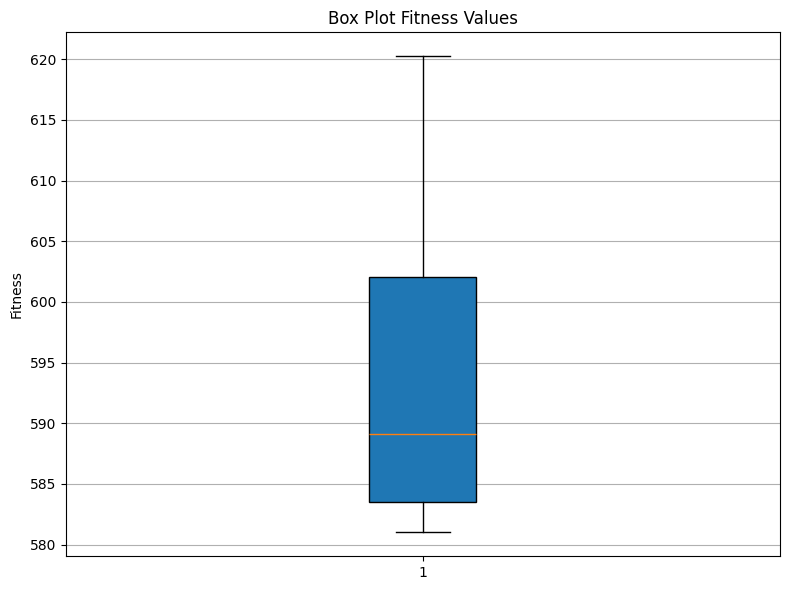

In [ ]:
# Boxplot. Creating one for each algorithm execution enables fair comparisons. Here is the function to calculate and print it. In order to create it i take 10 different execution of the algorithm with the same paramethers of population and mutation rate
def plot_fitness_boxplot(results_set):
    fitness_values = [result["fitness"] for result in results_set]

    plt.figure(figsize=(8, 6))
    plt.boxplot(fitness_values, vert=True, patch_artist=True)
    plt.ylabel('Fitness')
    plt.title('Box Plot Fitness Values')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

plot_fitness_boxplot(results)

## save file csv

In [ ]:
df = pd.DataFrame(results)

# Save the dataframe in a .csv file
df.to_csv('genetic_algorithm_results_pop10_m1.csv', index=False)

# upload and processing of csv file

In [ ]:
# I used this in order to retrieve data if I forgot to compute something. Put the name of the csv file to analyze
file_path = 'genetic_algorithm_results_pop10_m6.csv'

df = pd.read_csv(file_path, header=0)      #header = 0 means that in the first line are contained the descriptors of each column

In [ ]:
datas =[]
for i in range(10):

  row = df.iloc[i]

  data = {
        'iteration': row['iteration'],
        'fitness': row['fitness'],
        'cities': np.array(eval(row['cities'])),  # it uses eval than it converts the string in an array
        'execution_time': row['execution_time']
    }
  datas.append(data)


for i in datas:
  print(i['fitness'])

618.09743830898
630.8359604067214
589.3560561440434
611.648074602262
611.6462984092457
615.2225315135723
632.0434246093068
586.6212714312326
577.3552742606786
585.7416075642504


In [ ]:
#here to retrieve the values of mean fitness and standard deviation
fitness_values = [result["fitness"] for result in datas]
mean_fitness = np.mean(fitness_values)
std_fitness = np.std(fitness_values)
print(f"Mean Fitness: {mean_fitness}, Standard Deviation: {std_fitness}")

Mean Fitness: 605.8567937250293, Standard Deviation: 18.637443796600238


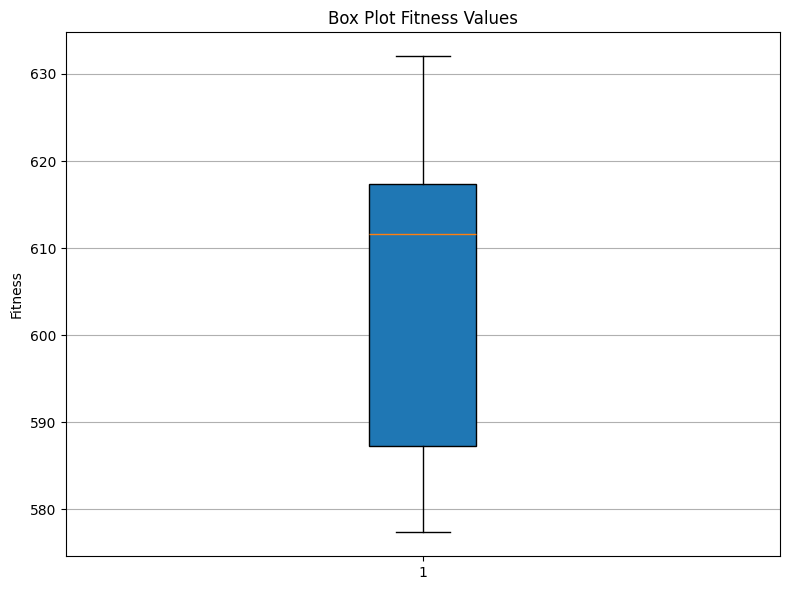

In [ ]:

def plot_fitness_boxplot(datas):
    fitness_values = [result["fitness"] for result in datas]

    plt.figure(figsize=(8, 6))
    plt.boxplot(fitness_values, vert=True, patch_artist=True)
    plt.ylabel('Fitness')
    plt.title('Box Plot Fitness Values')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


plot_fitness_boxplot(datas)

In [ ]:
#in order to calculate the average time of execution of a specific value of population and mutation rate

average_time = 0
for i in datas:
  average_time = i['execution_time'] + average_time
  print(i['execution_time'])
average_time = average_time/10
print(f"average execution time: {average_time:.4f}")

87.81602191925049
91.88027834892272
81.52364945411682
50.57928419113159
51.818246603012085
49.88583779335022
48.81124663352966
48.99233675003052
48.47024488449097
49.22393178939819
average execution time: 60.9001
